# Explore Cofffee

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [74]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Libraries
from scipy.stats import gaussian_kde
import numpy as np
from scipy.stats import pearsonr # for correlation calculation
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as locater # for axis formatting
#import plotly.express as px # for interactive plots
import math # for mathematical operations not found in numpy or native python

In [75]:
# import data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

In [76]:
# TODO: view first 5 rows of your data
coffee.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
1,Brazil,Espirito Santo,Arabica,2.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
2,Brazil,Espirito Santo,Robusta,7.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
3,Brazil,Sao Paulo,Arabica,3.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
4,Brazil,Parana,Arabica,0.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0


In [77]:
# TODO: describe your numeric columns
coffee.describe()

,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
count,114.000000,114.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,8.812281,2012.552632,994.495413,5646.926606,298.055046,2146.513761,2639.027523,3345.082569
std,9.051550,6.265642,310.338484,372.684151,97.572559,96.699000,245.497999,175.124513
min,0.500000,2002.000000,466.000000,4465.000000,148.000000,2010.000000,2106.000000,3030.000000
25%,2.600000,2007.000000,679.000000,5640.000000,205.000000,2070.000000,2552.000000,3191.000000
50%,4.750000,2013.000000,1050.000000,5735.000000,307.000000,2135.000000,2679.000000,3415.000000
75%,12.175000,2018.000000,1185.000000,5810.000000,347.000000,2223.000000,2786.000000,3483.000000
max,34.800000,2023.000000,1510.000000,6200.000000,495.000000,2360.000000,3020.000000,3578.000000


In [78]:
# TODO: display the null values in your dataframe
coffee.isnull()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
109,False,False,False,False,False,False,False,False,False,False,False
110,False,False,False,False,False,False,False,False,False,False,False
111,False,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,False,False,False


In [79]:
coffee.isnull().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                5
bearing_trees                   5
nonbear_hectares                5
bearing_hectares                5
bearing_trees_per_hectare       5
nonbearing_trees_per_hectare    5
dtype: int64

In [80]:
# TODO: drop your null values
coffee.dropna()
#coffee = coffee.dropna()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
1,Brazil,Espirito Santo,Arabica,2.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
2,Brazil,Espirito Santo,Robusta,7.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
3,Brazil,Sao Paulo,Arabica,3.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
4,Brazil,Parana,Arabica,0.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
...,...,...,...,...,...,...,...,...,...,...,...
109,Brazil,Minas Gerais,Arabica,28.5,2023,1510.0,6100.0,475.0,2020.0,3020.0,3179.0
110,Brazil,Espirito Santo,Arabica,4.4,2023,1510.0,6100.0,475.0,2020.0,3020.0,3179.0
111,Brazil,Espirito Santo,Robusta,16.6,2023,1510.0,6100.0,475.0,2020.0,3020.0,3179.0
112,Brazil,Sao Paulo,Arabica,5.1,2023,1510.0,6100.0,475.0,2020.0,3020.0,3179.0


In [81]:
clean_coffee = coffee.dropna() #created new data frame variable instead of using inplace 

In [82]:
clean_coffee.shape #verifying integrity of new dataframe 

(109, 11)

In [83]:
# TODO: Select only Minas Gerais
clean_coffee['subdivision'] =='Minas Gerais'

0       True
1      False
2      False
3      False
4      False
       ...  
109     True
110    False
111    False
112    False
113    False
Name: subdivision, Length: 109, dtype: bool

In [84]:
# TODO: Select only Minas Gerais
#type(coffee["subdivision"])
clean_coffee["subdivision"],["Minas Gerais"]


(0        Minas Gerais
 1      Espirito Santo
 2      Espirito Santo
 3           Sao Paulo
 4              Parana
             ...      
 109      Minas Gerais
 110    Espirito Santo
 111    Espirito Santo
 112         Sao Paulo
 113            Parana
 Name: subdivision, Length: 109, dtype: object,
 ['Minas Gerais'])

In [85]:
# TODO: Select only Minas Gerais
iso_coffee = clean_coffee[clean_coffee["subdivision"] == "Minas Gerais"]
iso_coffee

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.20,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
5,Brazil,Minas Gerais,Arabica,26.70,2003,1125.0,5265.0,315.0,2360.0,2231.0,3577.0
10,Brazil,Minas Gerais,Arabica,14.40,2004,631.0,5050.0,205.0,2174.0,2323.0,3075.0
15,Brazil,Minas Gerais,Arabica,21.40,2005,466.0,5255.0,148.0,2305.0,2280.0,3149.0
20,Brazil,Minas Gerais,Arabica,16.30,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0
25,Brazil,Minas Gerais,Arabica,23.70,2007,563.0,5730.0,186.0,2245.0,2552.0,3030.0
30,Brazil,Minas Gerais,Arabica,16.85,2008,679.0,5720.0,196.0,2235.0,2559.0,3468.0
35,Brazil,Minas Gerais,Arabica,25.55,2009,663.0,5770.0,188.0,2223.0,2596.0,3527.0
40,Brazil,Minas Gerais,Arabica,22.10,2010,873.0,5725.0,244.0,2151.0,2662.0,3578.0
45,Brazil,Minas Gerais,Arabica,28.50,2011,815.0,5820.0,234.0,2175.0,2676.0,3483.0


In [86]:
iso_coffee = iso_coffee.loc[:"Minas Gerais"]
iso_coffee

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.20,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
5,Brazil,Minas Gerais,Arabica,26.70,2003,1125.0,5265.0,315.0,2360.0,2231.0,3577.0
10,Brazil,Minas Gerais,Arabica,14.40,2004,631.0,5050.0,205.0,2174.0,2323.0,3075.0
15,Brazil,Minas Gerais,Arabica,21.40,2005,466.0,5255.0,148.0,2305.0,2280.0,3149.0
20,Brazil,Minas Gerais,Arabica,16.30,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0
25,Brazil,Minas Gerais,Arabica,23.70,2007,563.0,5730.0,186.0,2245.0,2552.0,3030.0
30,Brazil,Minas Gerais,Arabica,16.85,2008,679.0,5720.0,196.0,2235.0,2559.0,3468.0
35,Brazil,Minas Gerais,Arabica,25.55,2009,663.0,5770.0,188.0,2223.0,2596.0,3527.0
40,Brazil,Minas Gerais,Arabica,22.10,2010,873.0,5725.0,244.0,2151.0,2662.0,3578.0
45,Brazil,Minas Gerais,Arabica,28.50,2011,815.0,5820.0,234.0,2175.0,2676.0,3483.0


In [87]:
iso_coffee.head()


,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
5,Brazil,Minas Gerais,Arabica,26.7,2003,1125.0,5265.0,315.0,2360.0,2231.0,3577.0
10,Brazil,Minas Gerais,Arabica,14.4,2004,631.0,5050.0,205.0,2174.0,2323.0,3075.0
15,Brazil,Minas Gerais,Arabica,21.4,2005,466.0,5255.0,148.0,2305.0,2280.0,3149.0
20,Brazil,Minas Gerais,Arabica,16.3,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0


In [88]:
iso_coffee.shape


(21, 11)

## 🧠Univariate Analysis 

"""
Univariate Analysis

How is bearing_trees, bearing_hectares, and 60kgs_bag changing across the years in Minas Gerais? 

Are these variables increasing or decreasing?

What is the distribution of bearing_trees, bearing_hectares, and 60kgs_bag in Minas Gerais? Do these variables follow a normal distribution?


Bivariate Analysis

What is the relationship between bearing_trees and 60kgs_bag in Minas Gerais? How strong is this relationship? Use pearson's correlation coefficient.
What is the relationship between bearing_hectares and 60kgs_bag in Minas Gerais? How strong is this relationship? Use pearson's correlation coefficient.
"""

"""
coffee_output This dataset describes yearly features related to the coffee harvest that begins in June and ends in September in Minas Gerais.

country: Country where harvest occurs (all should be Brazil).
subdivision: Name of sub-division (all should be Minais Gerais)
type: Type of coffee bean
60kgs_bag: 60 kg bags of coffee beans harvested (million bags)
year: Year of harvest
nonbearing_trees: Amount of nonbearing coffee trees (million trees)
bearing_trees: Amount of bearing coffee trees (million trees)
nonbear_hectares: Hectares of nonbearing coffee trees (thousand hectares)
bearing_hectares_per_hectare: Average number of bearing trees per hectare
nonbearing_trees_per_hectare: Average number of non-bearing trees per hectare
    """

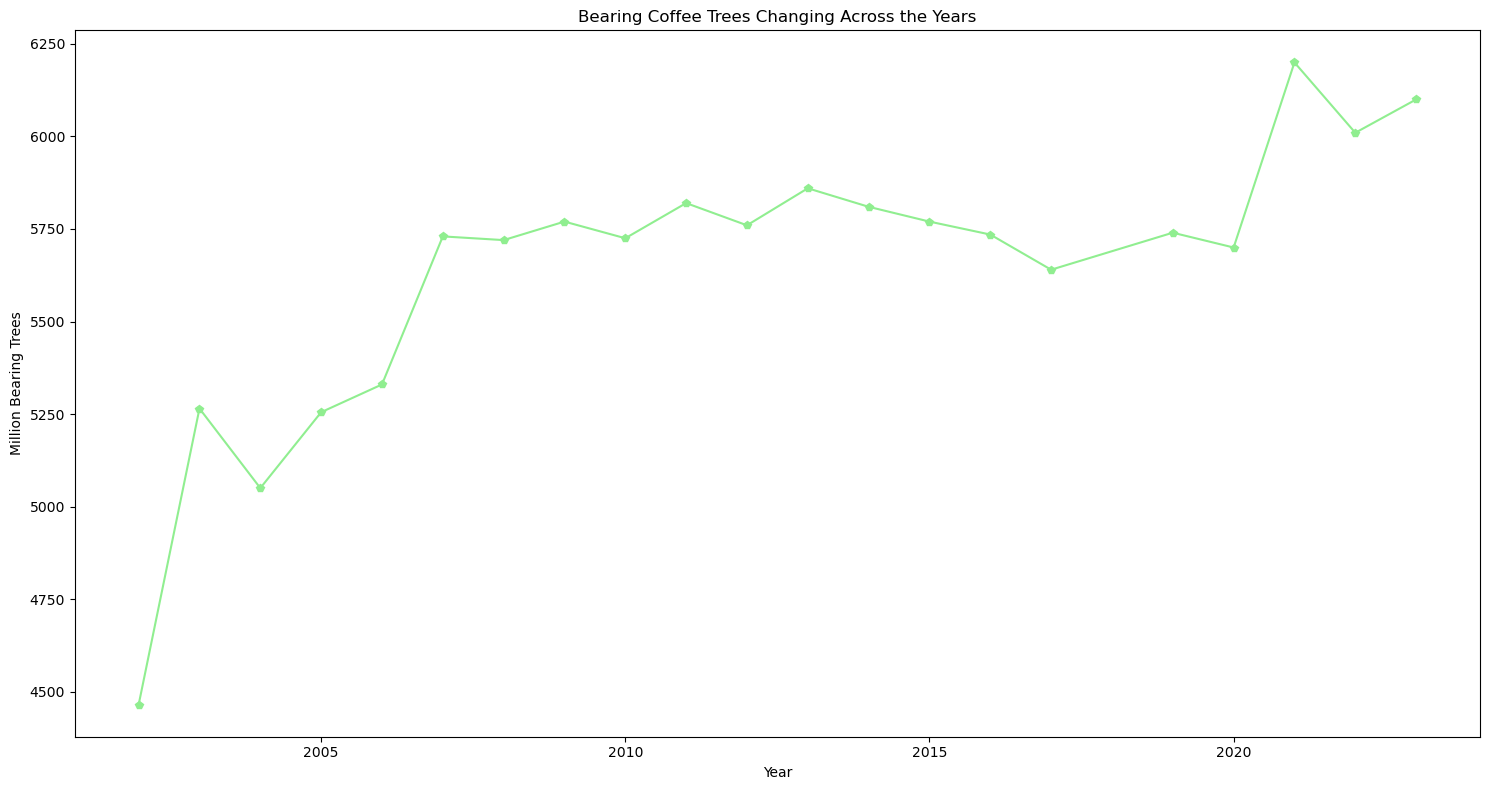

In [ ]:
# TODO: BEGIN YOUR EDA!
#How is bearing trees changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?
#Change over time	📈 Upward trend from 2002 to 2023
iso_coffee.groupby("year")["bearing_trees"].mean().plot(kind="line", marker="p", color="lightgreen", figsize=(15,8))
plt.xlabel("Year")
plt.ylabel("Million Bearing Trees")
plt.title("Bearing Coffee Trees Changing Across the Years")  
plt.tight_layout()


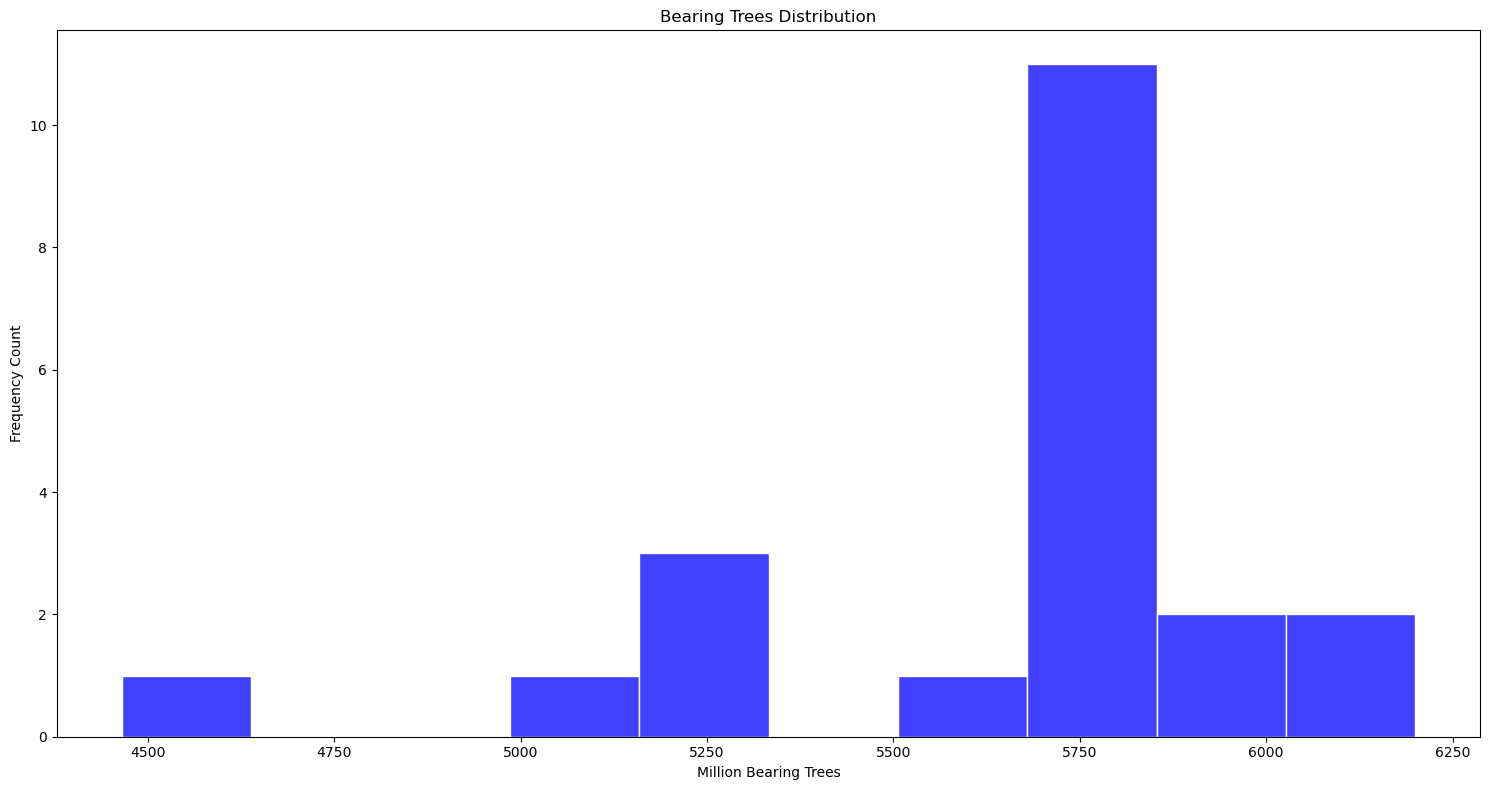

In [ ]:
# Histogram Distribution Frequency Count of Bearing Trees - Frequency of values	🔍 Most years fall between 5,500–6,000
plt.figure(figsize=(15,8))
sns.histplot(iso_coffee["bearing_trees"], bins=10, color="blue", edgecolor="white")
plt.title("Bearing Trees Distribution")
plt.xlabel("Million Bearing Trees") 
plt.ylabel("Frequency Count")
plt.tight_layout()

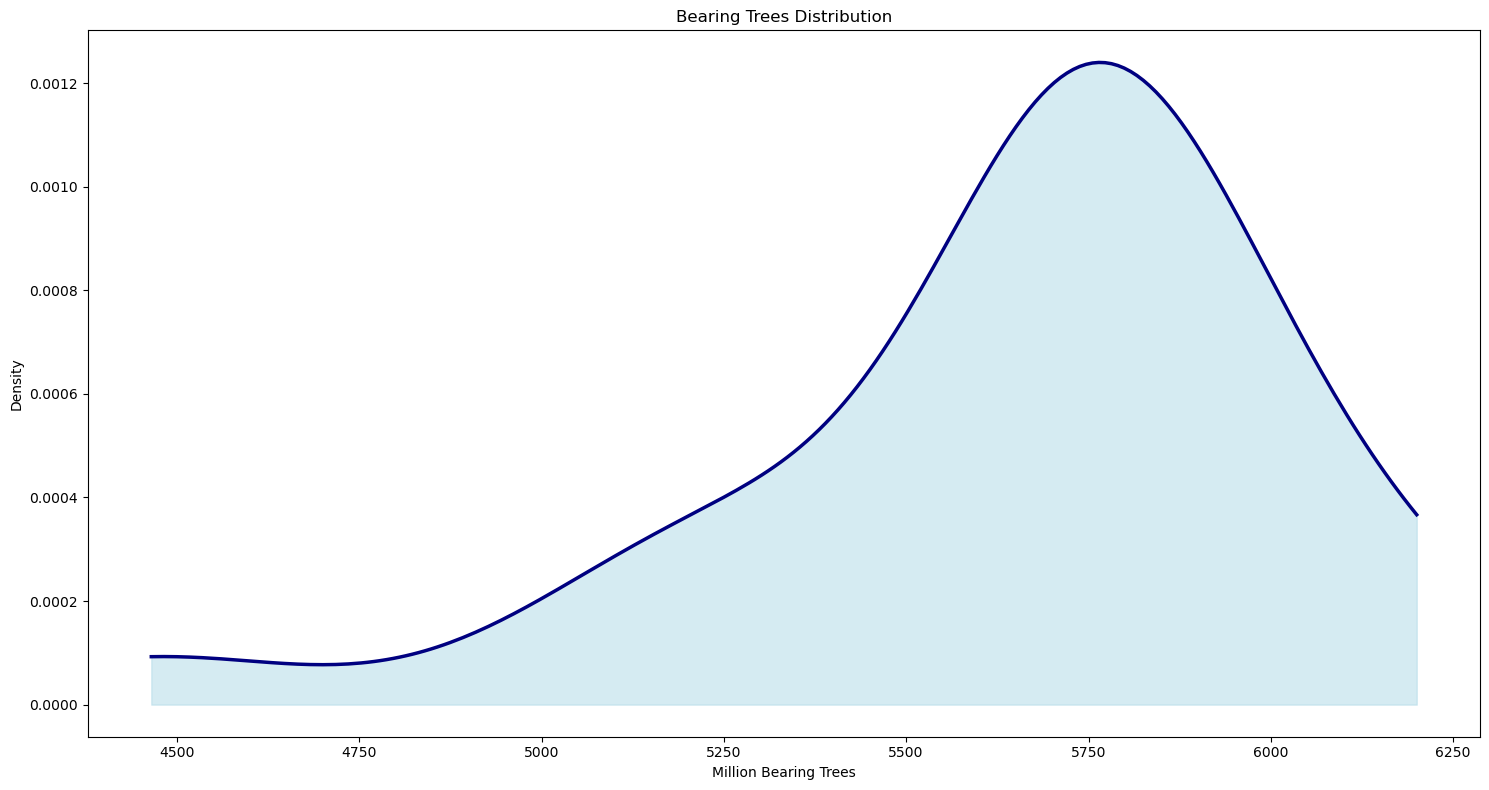

In [102]:
# KDE Plot — Distribution Shape & Normality - Slight right skew — not perfectly normal
#Smooth distribution shape	⚠️ Slight right skew — not perfectly normal
data = iso_coffee["bearing_trees"]
density = gaussian_kde(data)
xs = np.linspace(min(data), max(data), 200)

plt.figure(figsize=(15, 8))
plt.plot(xs, density(xs), color="navy", linewidth=2.5)
plt.fill_between(xs, density(xs), color="lightblue", alpha=0.5)
plt.title("Bearing Trees Distribution")
plt.xlabel("Million Bearing Trees")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


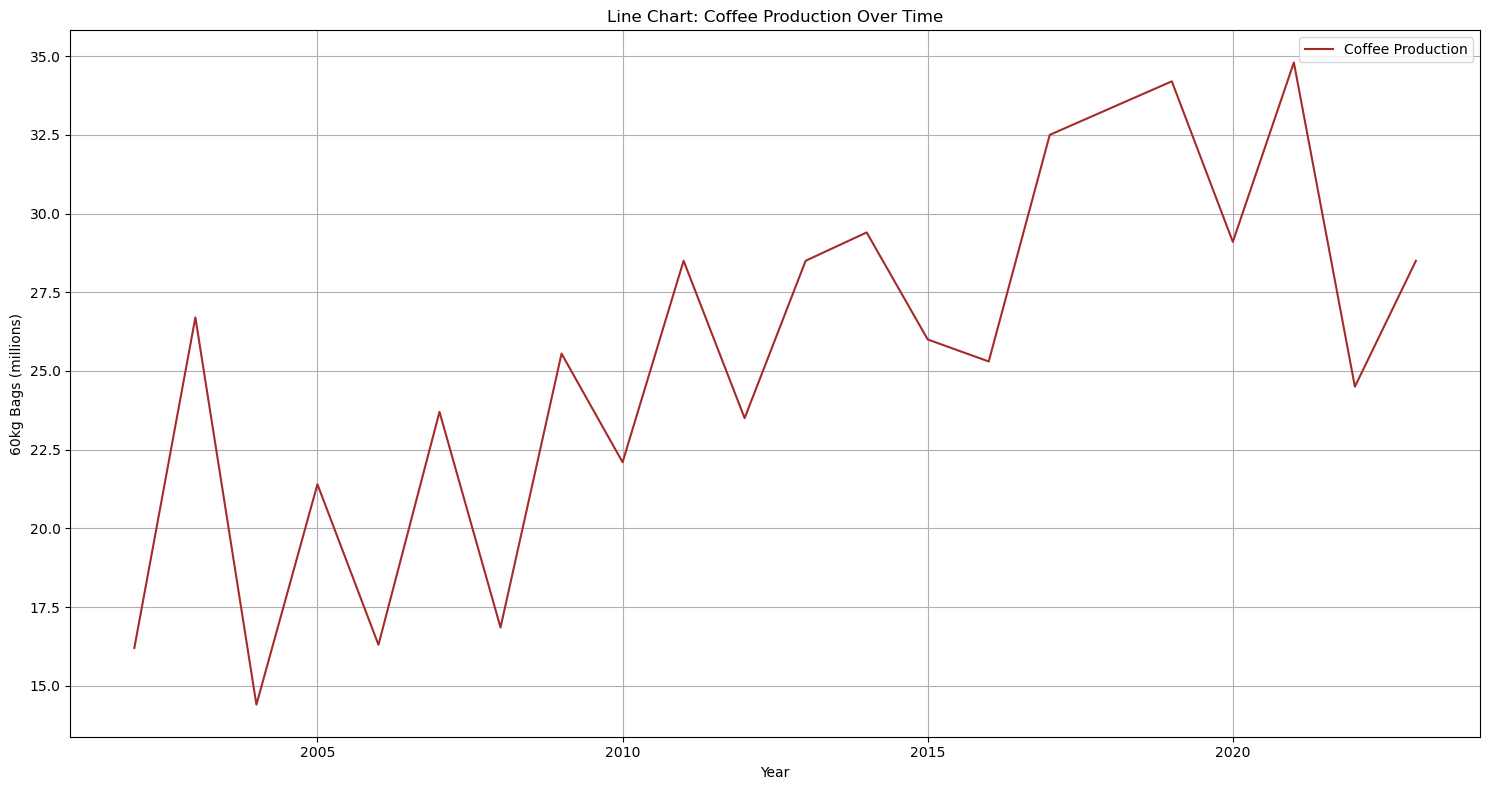

In [92]:
# Coffee production changing over time
plt.figure(figsize=(15, 8))
sns.lineplot(x="year", y="60kgs_bag", data=iso_coffee, color="brown", label="Coffee Production")
plt.title("Line Chart: Coffee Production Over Time")
plt.xlabel("Year")
plt.ylabel("60kg Bags (millions)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


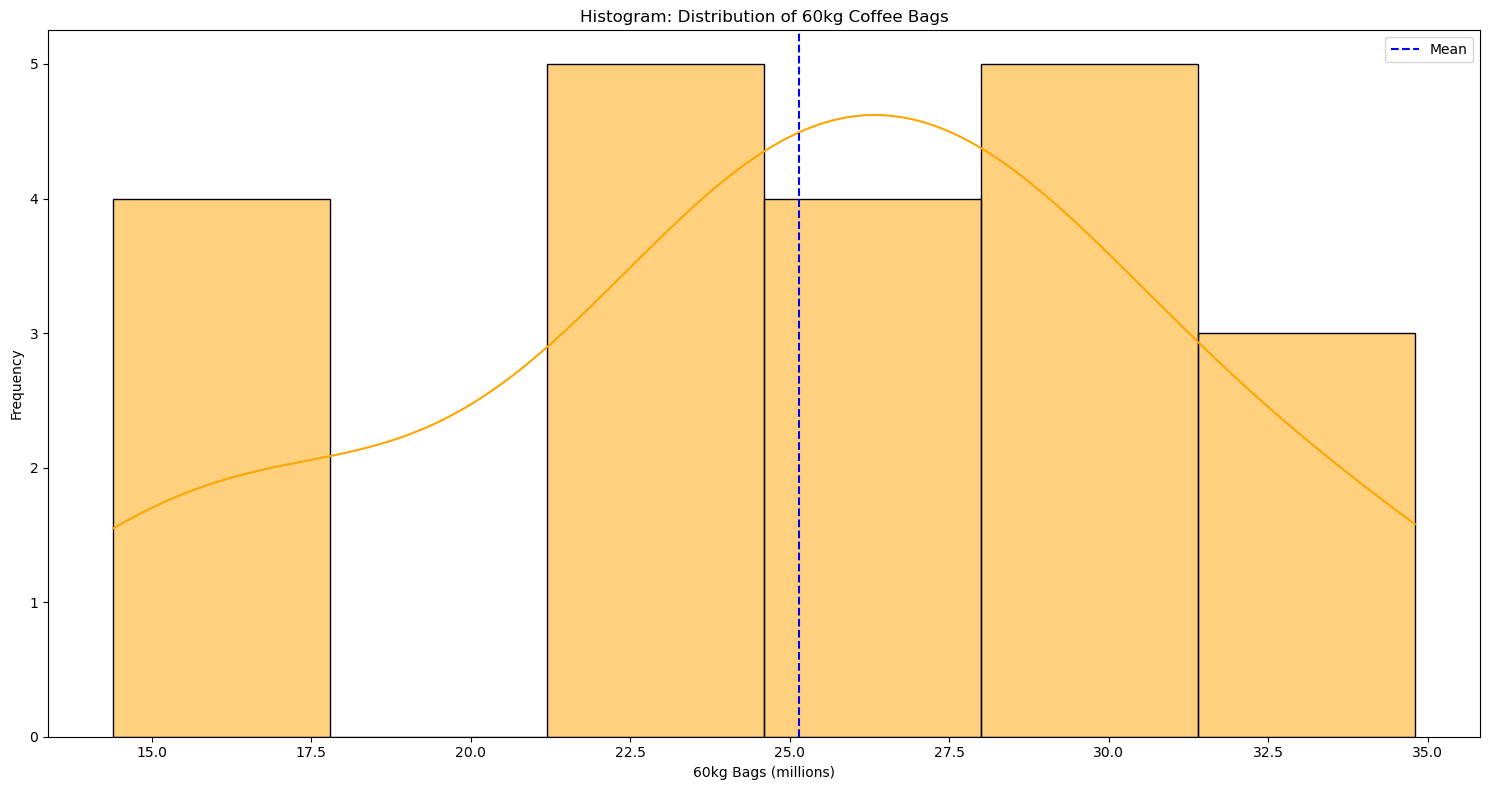

In [93]:
# Distribution of coffee production (60kgs_bag)
plt.figure(figsize=(15, 8))
sns.histplot(iso_coffee["60kgs_bag"], kde=True, color="orange", edgecolor="black")
plt.axvline(iso_coffee["60kgs_bag"].mean(), color="blue", linestyle="--", label="Mean")
plt.title("Histogram: Distribution of 60kg Coffee Bags")
plt.xlabel("60kg Bags (millions)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

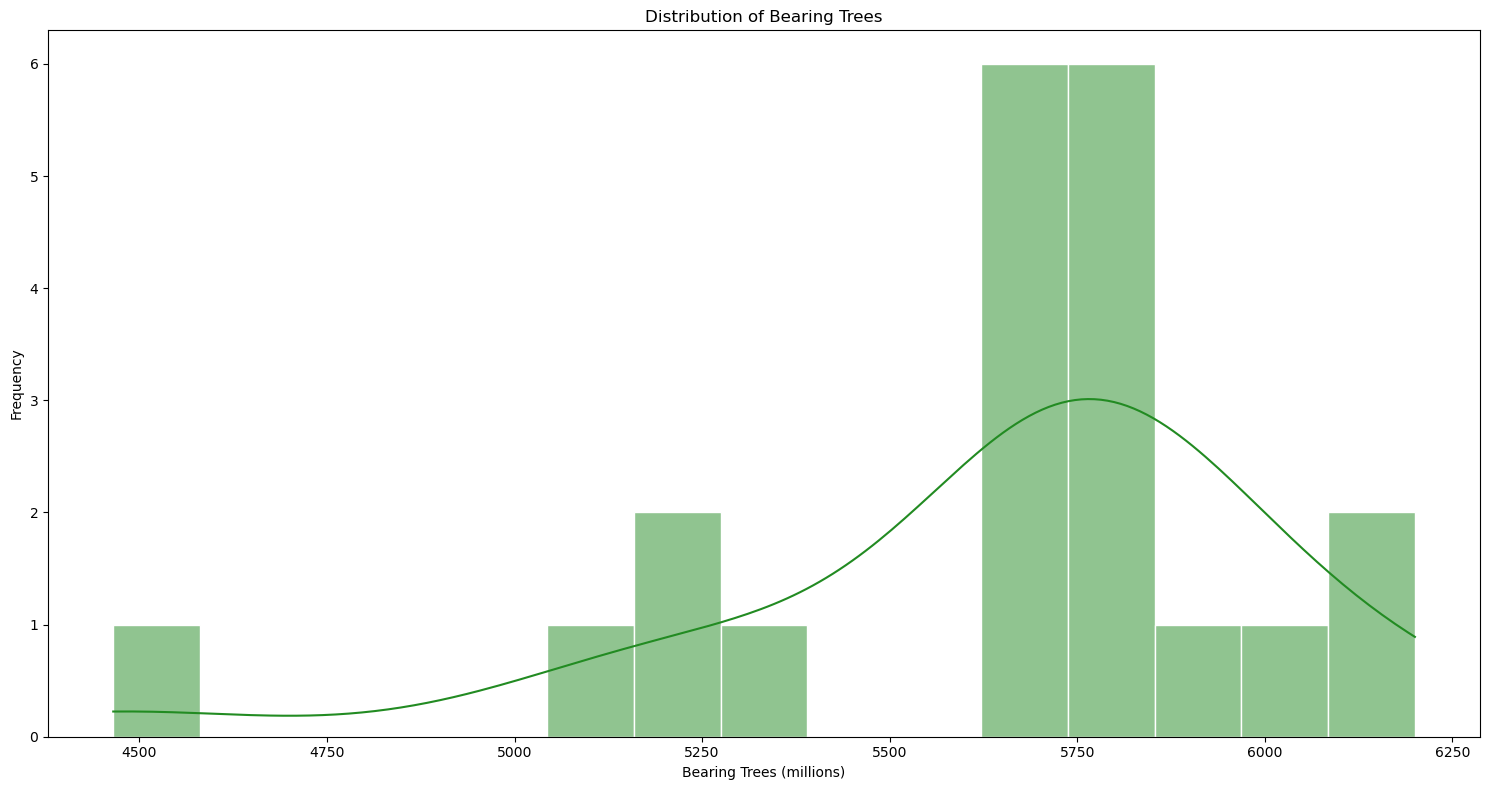

In [94]:
# Distribution of this Bearing Trees
plt.figure(figsize=(15, 8))
sns.histplot(iso_coffee["bearing_trees"], kde=True, color="forestgreen", edgecolor="white")
plt.title("Distribution of Bearing Trees")
plt.xlabel("Bearing Trees (millions)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


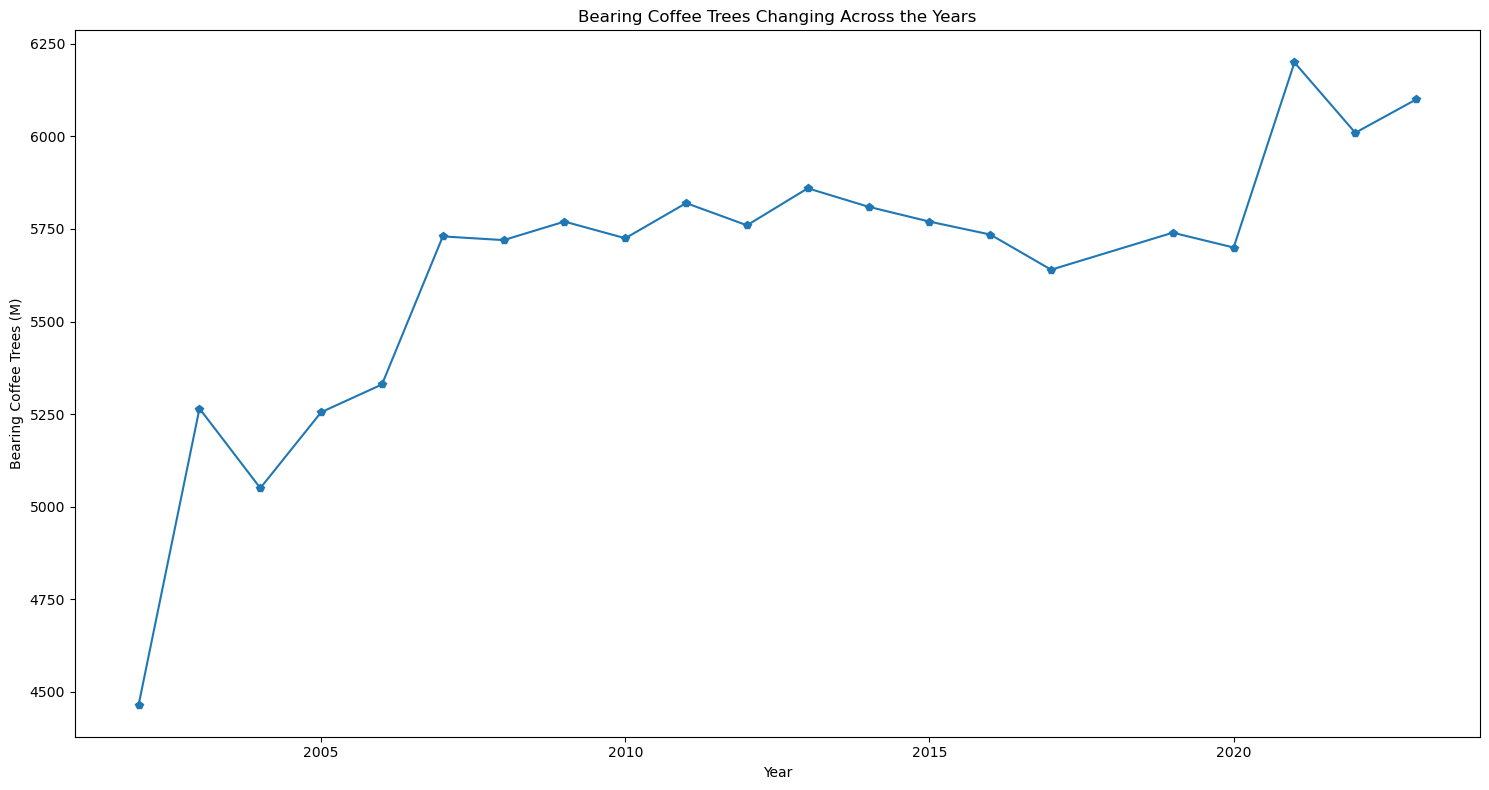

In [95]:
# How is bearing hectares changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?
iso_coffee.groupby("year")["bearing_trees"].mean().plot(kind="line", marker="p", figsize=(15,8))
plt.xlabel("Year")
plt.ylabel("Bearing Coffee Trees (M)")
plt.title("Bearing Coffee Trees Changing Across the Years")  
plt.tight_layout()

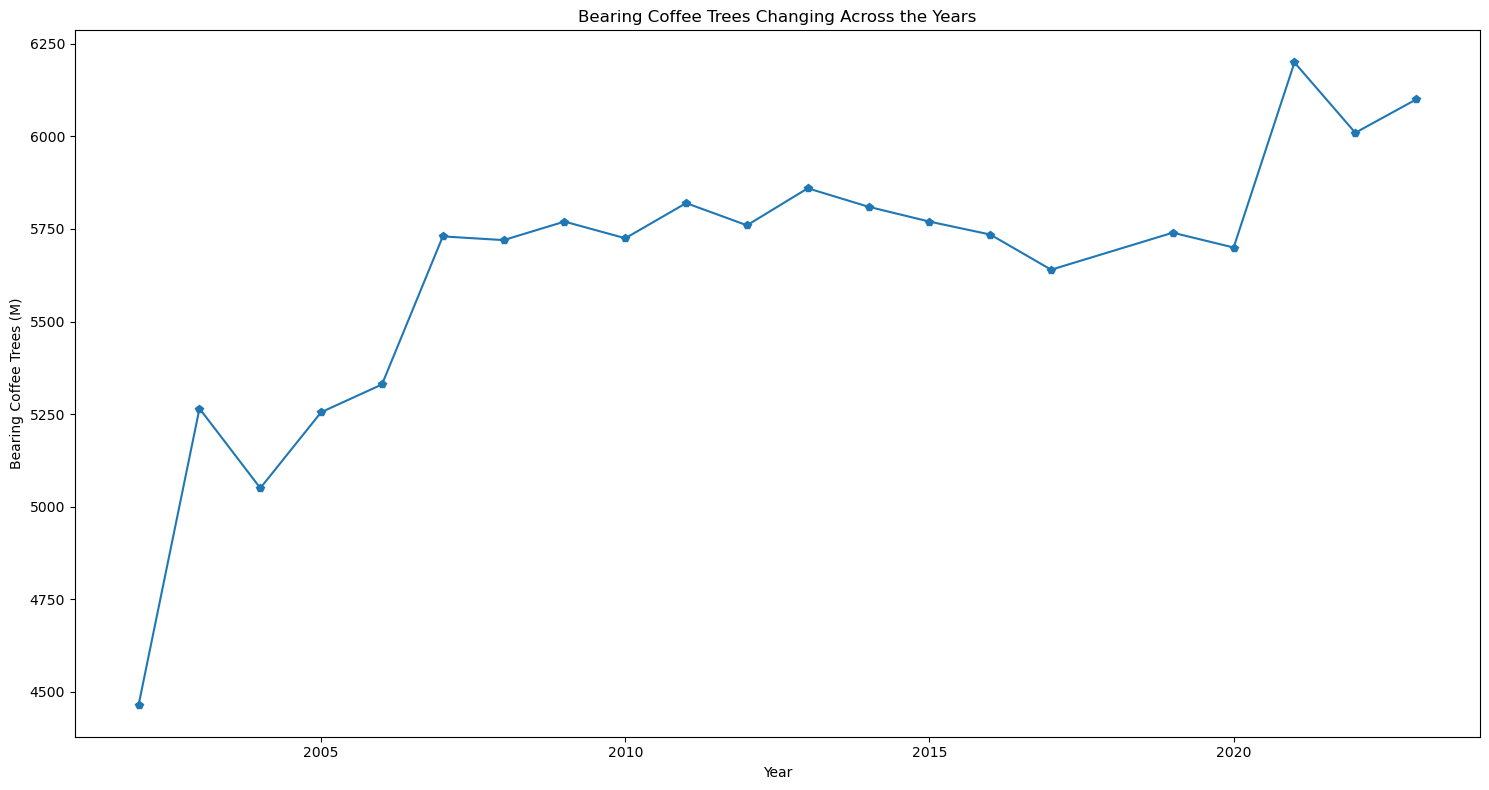

In [96]:
# How is the count of million 60kgs bags of coffee changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?
iso_coffee.groupby("year")["bearing_trees"].mean().plot(kind="line", marker="p", figsize=(15,8))
plt.xlabel("Year")
plt.ylabel("Bearing Coffee Trees (M)")
plt.title("Bearing Coffee Trees Changing Across the Years")  
plt.tight_layout()

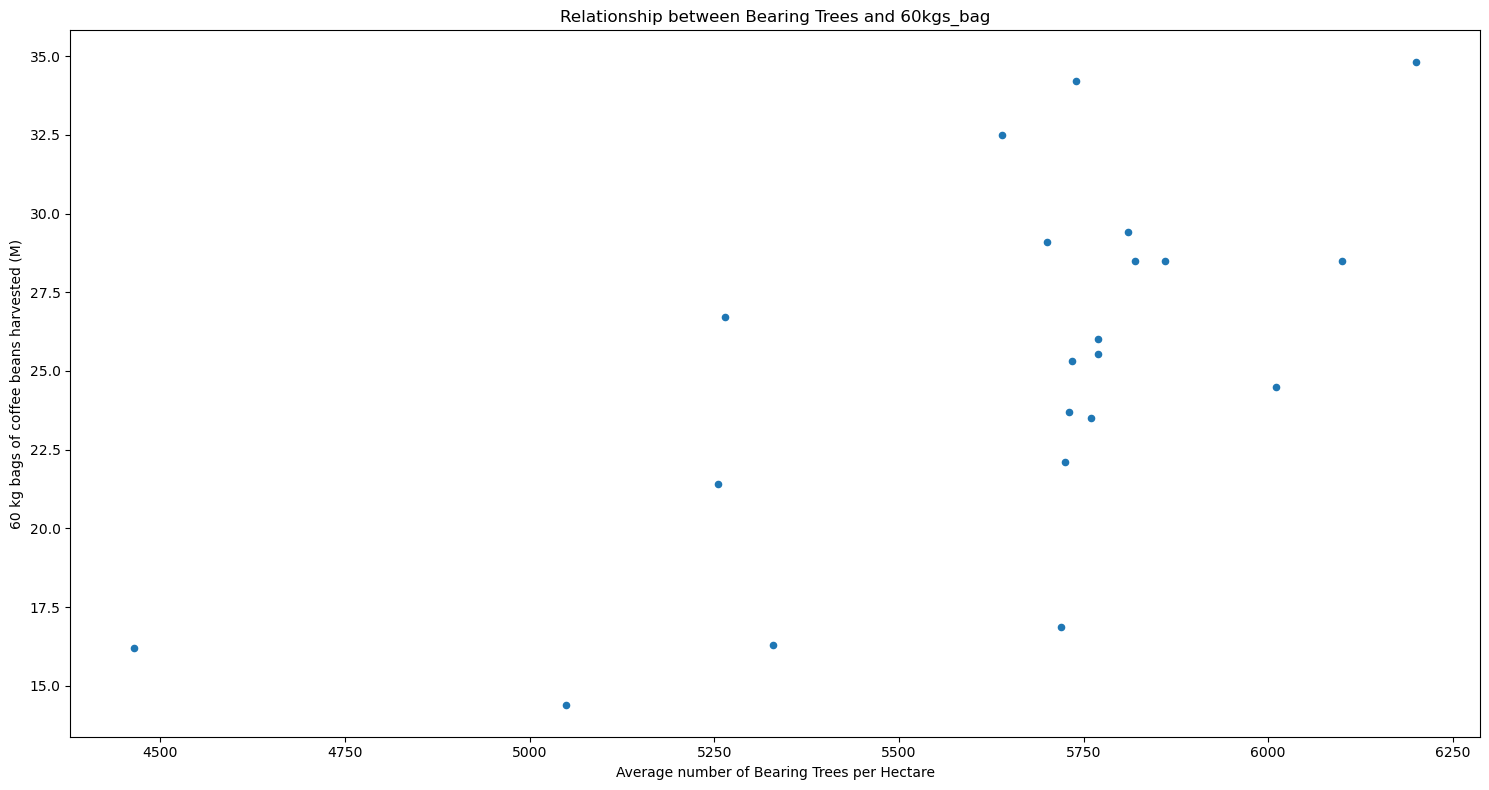

In [97]:
# What is the relationship between bearing_trees and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

iso_coffee.plot.scatter(x="bearing_trees", y="60kgs_bag",figsize=(15,8)) 
plt.xlabel("Average number of Bearing Trees per Hectare")
plt.ylabel("60 kg bags of coffee beans harvested (M)")
plt.title("Relationship between Bearing Trees and 60kgs_bag")  
plt.tight_layout()

In [98]:
iso_coffee["bearing_trees"].corr(iso_coffee["60kgs_bag"])  #Pearson's correlation coefficient for bearing_trees and 60kgs_bag. How *strong* is this relationship?


np.float64(0.6553434210069491)

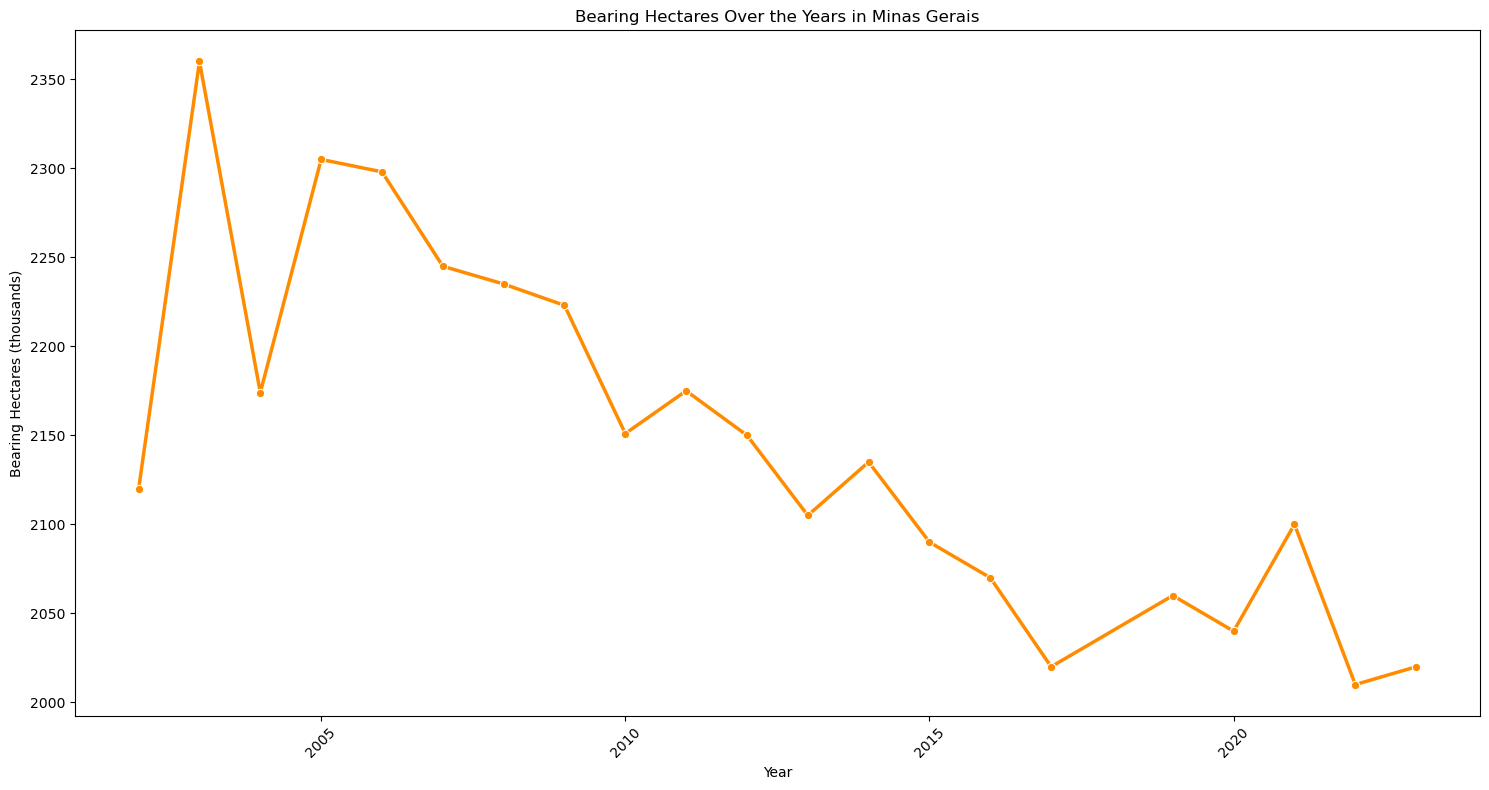

In [103]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=iso_coffee["year"], y=iso_coffee["bearing_hectares"], marker="o", color="darkorange", linewidth=2.5)
plt.title("Bearing Hectares Over the Years in Minas Gerais")
plt.xlabel("Year")
plt.ylabel("Bearing Hectares (thousands)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

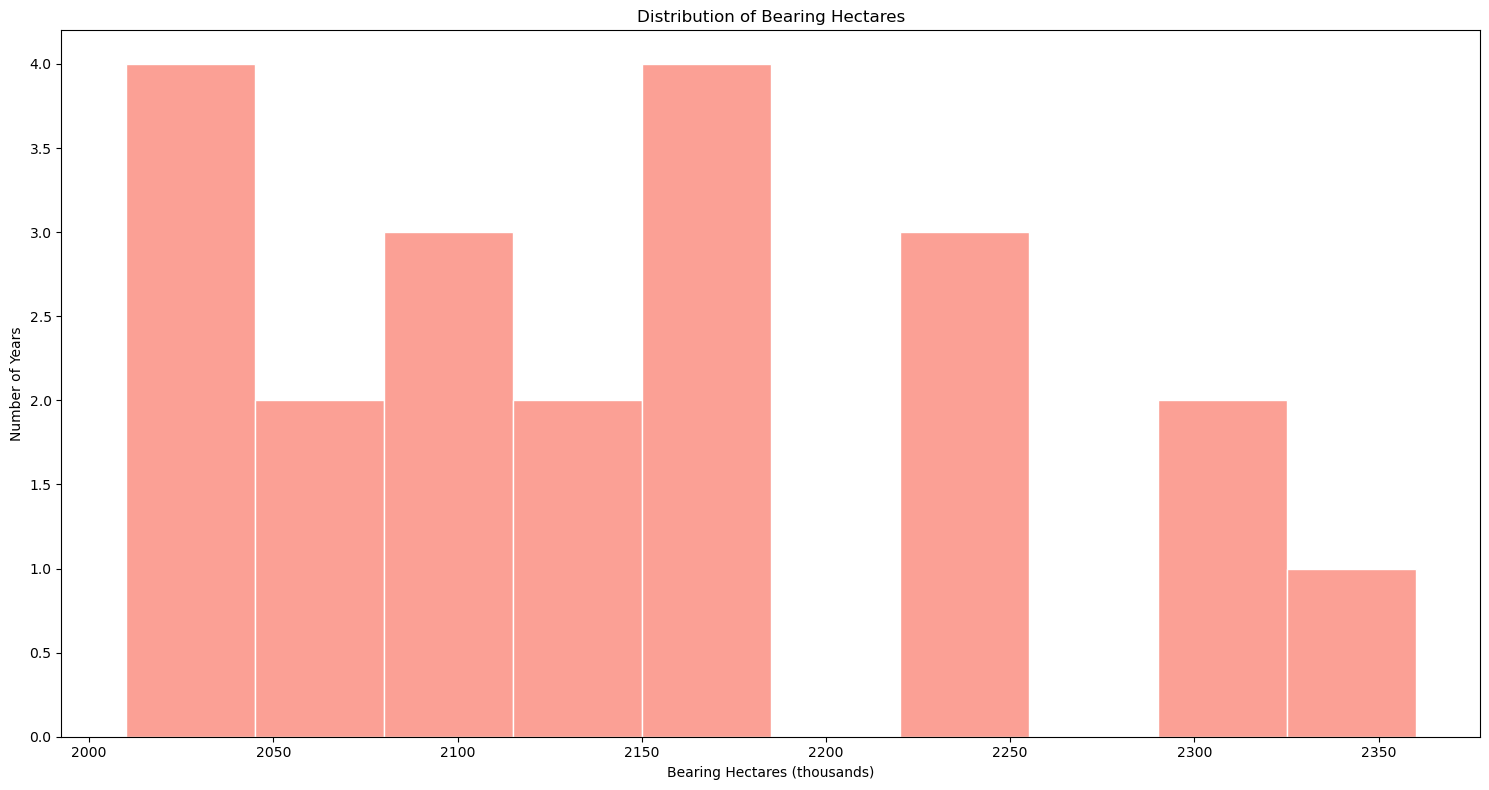

In [105]:
plt.figure(figsize=(15, 8))
sns.histplot(iso_coffee["bearing_hectares"], bins=10, color="salmon", edgecolor="white")
plt.title("Distribution of Bearing Hectares")
plt.xlabel("Bearing Hectares (thousands)")
plt.ylabel("Number of Years")
plt.tight_layout()
plt.show()


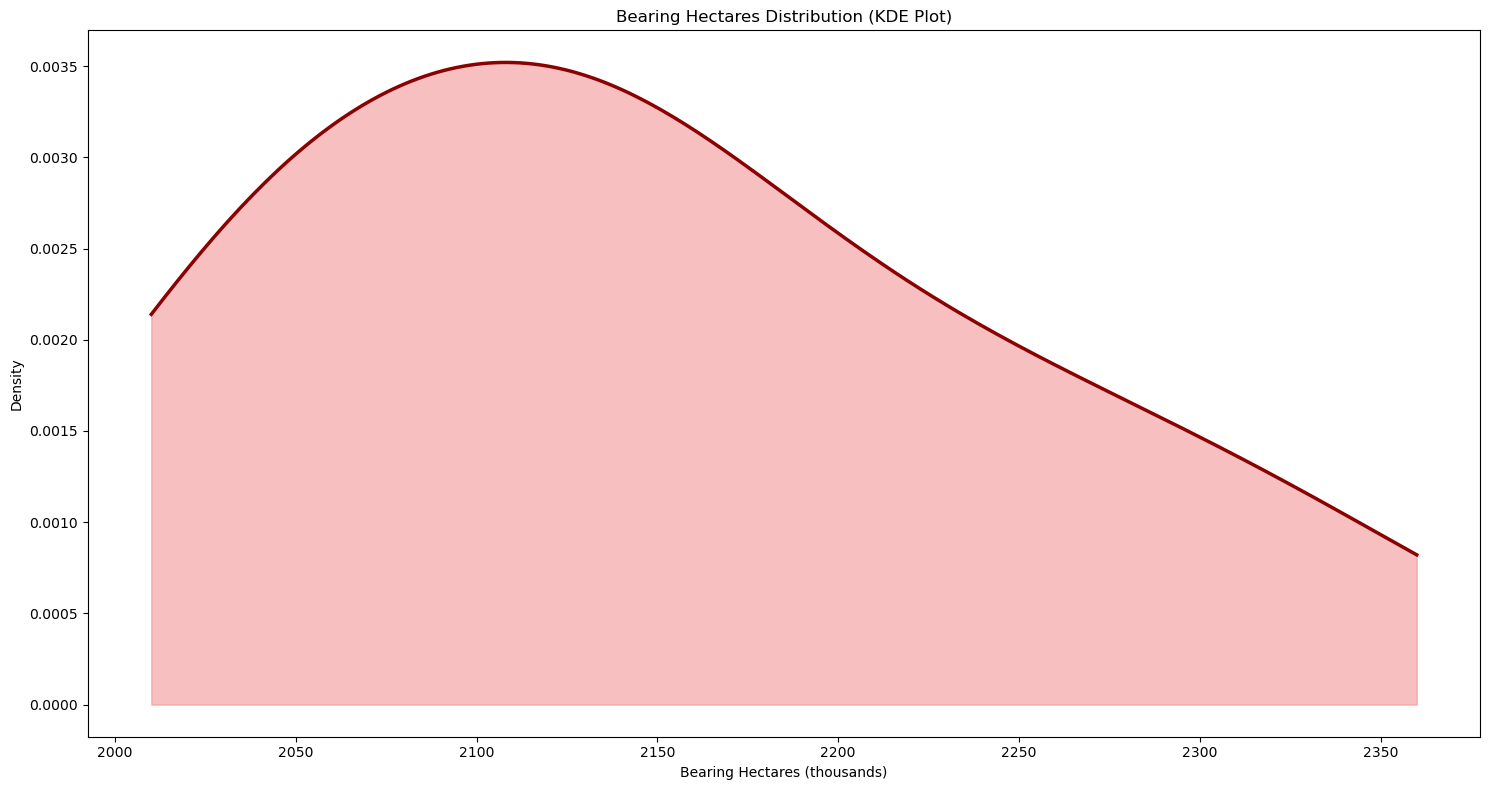

In [106]:
from scipy.stats import gaussian_kde
import numpy as np

data = iso_coffee["bearing_hectares"]
density = gaussian_kde(data)
xs = np.linspace(min(data), max(data), 200)

plt.figure(figsize=(15, 8))
plt.plot(xs, density(xs), color="darkred", linewidth=2.5)
plt.fill_between(xs, density(xs), color="lightcoral", alpha=0.5)
plt.title("Bearing Hectares Distribution (KDE Plot)")
plt.xlabel("Bearing Hectares (thousands)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


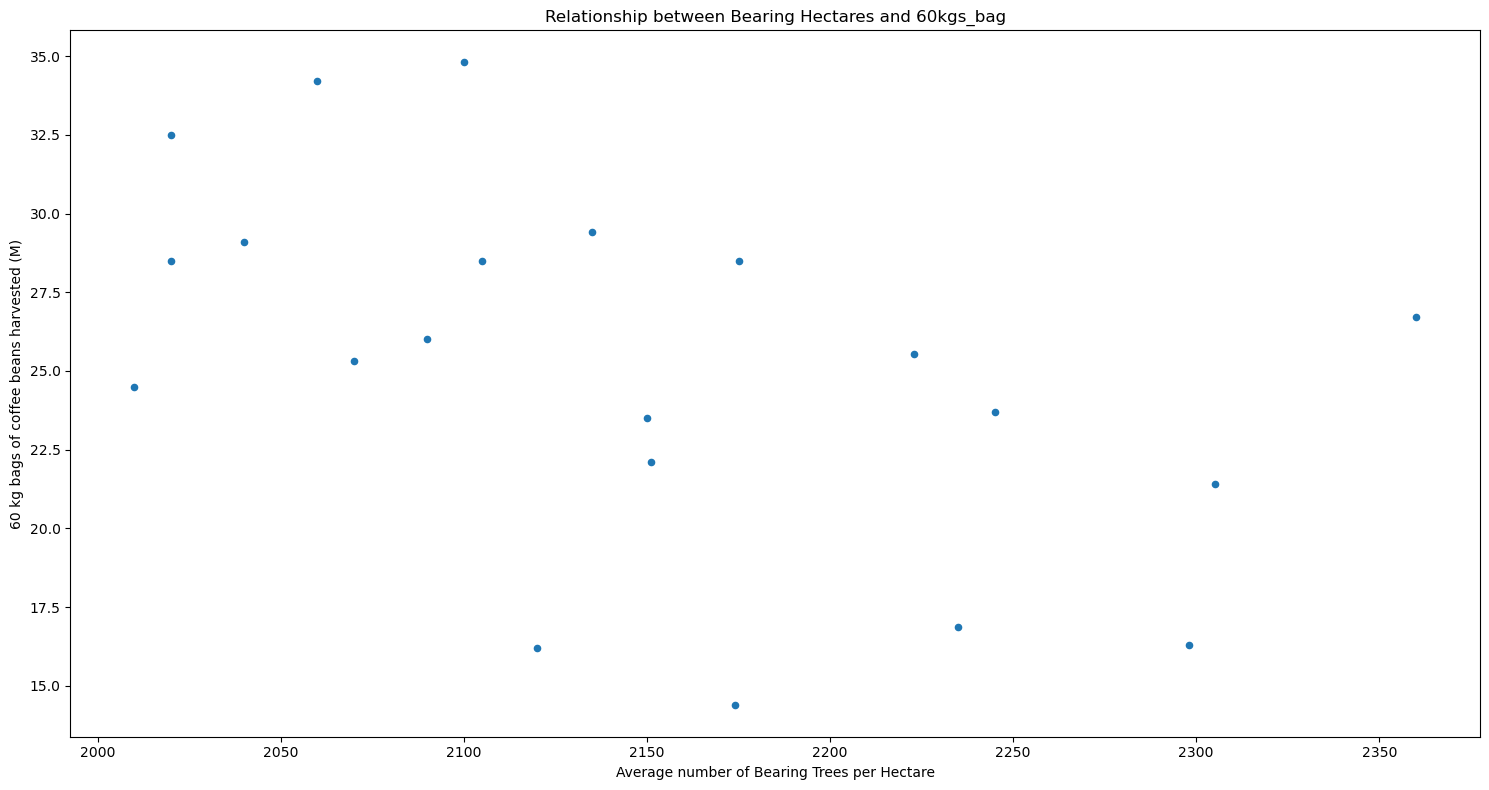

In [99]:
# What is the relationship between bearing_hectares and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.
iso_coffee.plot.scatter(x="bearing_hectares", y="60kgs_bag",figsize=(15,8)) 
plt.xlabel("Average number of Bearing Trees per Hectare")
plt.ylabel("60 kg bags of coffee beans harvested (M)")
plt.title("Relationship between Bearing Hectares and 60kgs_bag")  
plt.tight_layout()

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

## How is bearing trees changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

It appears from analyzing trees, from 2002 to 2023, in Minas Gerais that the number of bearing trees have steadily increased from approximately 4,465 million to 6,100 million. The line plot shows a consistent upward trend over the years with minor fluctuations. This indicates that bearing trees are increasing steadily in Minas Gerais throughout June and ends in September

While the distribution is slightly right-skewed, as evidenced by the histogram and the asymmetrical KDE curve, most values fall between 5,500 million and 6,000 million, with a mean of approximately 5,635 bearing trees.

The number of bearing trees in Minas Gerais is increasing over time. Since the data is relatively concentrated around the mean and the distribution is not perfectly normal, we observe a longer right tail, indicating that higher values have occurred more recently.

However, the spread is not extreme, and the variable exhibits a strong central tendency, showing that most years had moderately high counts, with recent years pushing the values even higher.

Therefore, the distribution is not perfectly normal, but it remains relatively stable and concentrated. 

## How is bearing hectares changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

Based on the line plot of bearing_hectares from 2002 to 2023, there is a gradual decreasing trend in the total hectares of bearing coffee trees in Minas Gerais. The data begins at 2,120 thousand hectares in 2002, reaches a peak of 2,360 thousand hectares around 2003, and steadily declines to about 2,020 thousand hectares by 2023. While there are small fluctuations, the overall pattern is downward, suggesting a shift toward either more efficient land use or reallocation of land away from bearing plantations.

These trends appear to be reinforced by the distribution charts, as the histogram shows that most values fall between 2,000 and 2,200 thousand hectares, indicating that the majority of the recorded years had moderately low land area under bearing coffee trees. In addition, the KDE plot, which smooths the distribution, shows a left-skewed pattern. This means that while lower values are common, there are a few higher values in earlier years (e.g., 2003–2005) that stretch the curve’s tail toward the right.

The mean area for bearing_hectares is around 2,150, with the range spanning from 2,010 to 2,360. The data is not normally distributed—this is clear from the asymmetry of the KDE curve, which does not resemble a classic bell shape. Instead, the curve suggests higher concentration in the lower range, especially in the most recent decade.

There are no strong outliers, but the gradual compression of values toward the lower end in recent years supports the conclusion that the amount of land used for bearing trees is shrinking slowly but steadily. This could be due to increased planting density, improved crop yields, or policy/infrastructure changes favoring compact plantations.

Theerefore, it appears that amount of land used for bearing coffee trees in Minas Gerais has been gradually decreasing since the early 2000s. While the data is not normally distributed, it is left-skewed, with most recent values concentrated in the lower hectare ranges. There are no extreme outliers, and the trend suggests greater efficiency or changing land use practices rather than sharp declines.

## How is the count of million 60kgs bags of coffee changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

Answer here

## What is the relationship between bearing_trees and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here


## What is the relationship between bearing_hectares and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.
Answer here